In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ASASM import mdft
import torch
import math

/home/hywei/anaconda3/envs/sampling/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
torch.manual_seed(0)
D = 35e-3 / 16
dx_diffuser = 2e-5
N_diffuser = int(D / dx_diffuser)
print(N_diffuser)
D = N_diffuser * dx_diffuser

# N_sample = int(D / (dx_diffuser / 41.2))
N_sample = 109
print(N_sample)
dx_sample = D / N_sample

109
109


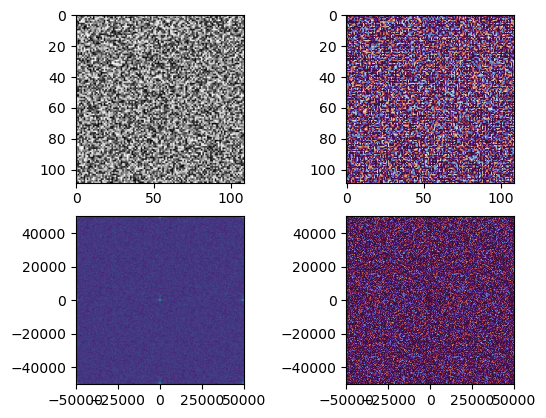

In [10]:
x = torch.linspace(-D/2, D/2, N_sample)
# xx, yy = torch.meshgrid(x, x, indexing='xy')
dx_freq = dx_diffuser / 2
fx1 = -1/(2*dx_freq)
fx2 = 1/(2*dx_freq)
fx = torch.linspace(fx1, fx2, 500)

amp = torch.rand(N_diffuser, N_diffuser)
amp_sample = torch.nn.functional.interpolate(amp[None,None,...], (N_sample,N_sample), mode='nearest')[0,0]
plate = amp_sample * torch.exp(1j * amp_sample * 2 * math.pi)
plt.subplot(2,2,1)
plt.imshow(abs(plate), cmap='gray')
plt.subplot(2,2,2)
plt.imshow(torch.angle(plate), cmap='twilight')

f_plate = mdft(plate, x, x, fx, fx)
plt.subplot(2,2,3)
plt.imshow(abs(f_plate)**0.5, extent=[fx1,fx2,fx1,fx2])
plt.subplot(2,2,4)
plt.imshow(torch.angle(f_plate), cmap='twilight', extent=[fx1,fx2,fx1,fx2])